In [1]:
import glob,os
import numpy as np
import pandas as pd

import astropy
import GCRCatalogs as gcr
from astropy.table import Table, setdiff, vstack

import matplotlib.pyplot as plt

In [2]:
## Sigma and DS profile
file_path = r"/global/u1/k/kamau/SE-CLMM-LSSTDESC/project-1/Data/"

sigma_ds_profile = pd.read_pickle(file_path +  'WL-Signal/skysim-full-2152757-1.1.1.csv')#.reset_index(drop=True)
# sigma_ds_1_1_2 = pd.read_pickle(file_path + 'WL-Signal/skysim-full-2152757_1.1.2.csv')#.reset_index(drop=True)
print(sigma_ds_profile.shape)
sigma_ds_profile = sigma_ds_profile[sigma_ds_profile['baseDC2/sod_halo_mass']>0]
print(len(sigma_ds_profile))
sigma_ds_profile.head()

## Reading the matched data (clusters-richness and halos)
cluster_halos = pd.read_pickle(file_path + 'halos/halos_redmapper.csv')
# cluster_rm = cluster_rm.to_pandas()# gt_df.append(a_series, ignore_index=True)
print(cluster_halos.shape)

# # Reading the halos data
# halos = Table.read(file_path + 'halos/skysim_0.2-1-2152757.dat', format='ascii')
# halos = halos.to_pandas()
# print(halos.shape)



(2152757, 13)
2149934
(37986, 18)


No handles with labels found to put in legend.


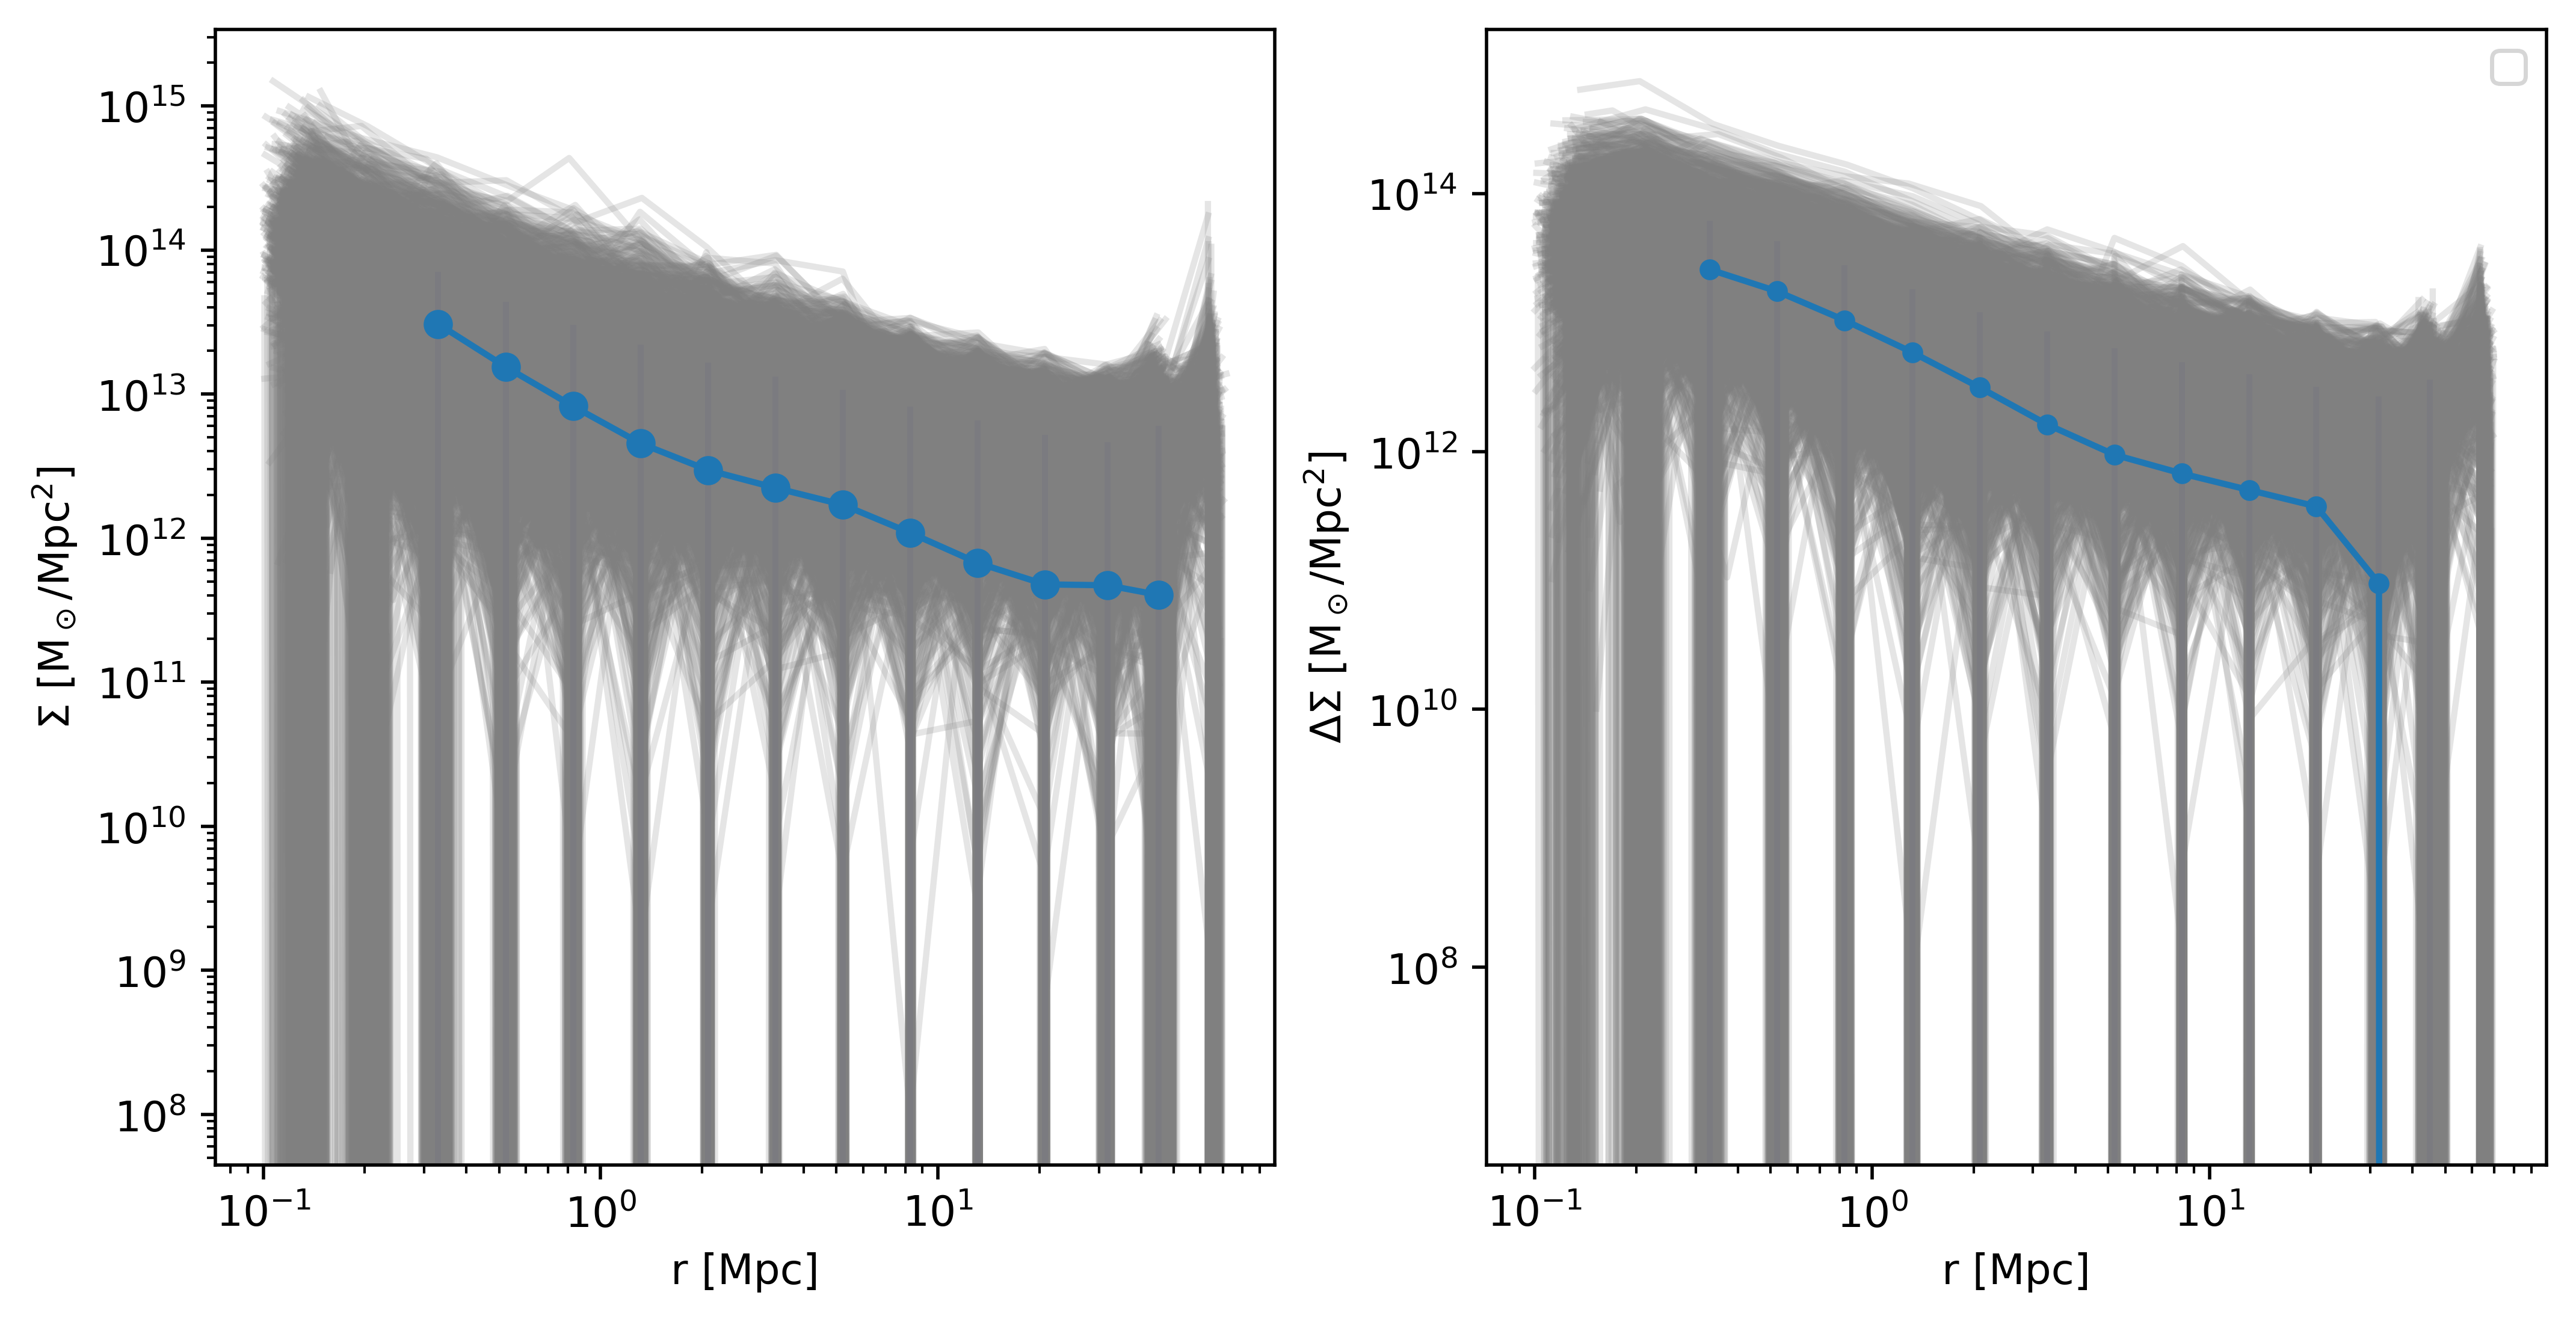

In [27]:
sigma_ds_profile = sigma_ds_profile[(sigma_ds_profile['redshift']>=0.2) & (sigma_ds_profile['redshift']<=0.21)]
sigma_ds_profile = sigma_ds_profile.reset_index(drop=True)
err_bar1 = np.std(np.array(sigma_ds_profile['sigma']))
err_bar = np.std(np.array(sigma_ds_profile['DS']))
# Create four subplots
fig, axs = plt.subplots(1, 2,figsize=(10, 5), dpi=500)
axs = axs.flatten()

for i in range(len(sigma_ds_profile)):
    axs[0].plot(sigma_ds_profile['radius'][i],sigma_ds_profile['sigma'][i],c='grey',alpha=0.2)
# axs[0].plot(sigma_ds_profile['radius'].mean(), np.mean(sigma_ds_profile['sigma'],axis=0),c='b', label='mean Sigma')
axs[0].errorbar(sigma_ds_profile['radius'].mean(), sigma_ds_profile['sigma'].mean(), yerr = err_bar1, marker = 'o')
# sigma =  [(i).tolist() for i in sigma_ds_profile['sigma']]
# plt.plot(sigma_ds_profile['radius'].mean(), np.median(sigma,axis=0),c='r', label='median')
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_xlabel('r [Mpc]')
axs[0].set_ylabel('$\Sigma ~[\mathrm{M}_\odot/\mathrm{Mpc}^2}$]')


for i in range(len(sigma_ds_profile)):
    plt.plot(sigma_ds_profile['radius'][i],sigma_ds_profile['DS'][i],c='grey',alpha=0.2)
# axs[1].plot(sigma_ds_profile['radius'].mean(), sigma_ds_profile['DS'].mean(),c='b', label='mean DS')
axs[1].errorbar(sigma_ds_profile['radius'].mean(), sigma_ds_profile['DS'].mean(), yerr = err_bar, marker = 'o', ms = 4.0)
# ds =  [(i).tolist() for i in sigma_ds_profile['DS']]
# axs[1].plot(sigma_ds_profile['radius'].mean(), np.median(ds,axis=0),c='r') 
axs[1].set_xlabel('r [Mpc]')
axs[1].set_ylabel('$\Delta\Sigma ~ [\mathrm{M}_\odot/\mathrm{Mpc}^2}$]')
axs[1].set_xscale('log')
axs[1].set_yscale('log')

plt.show()

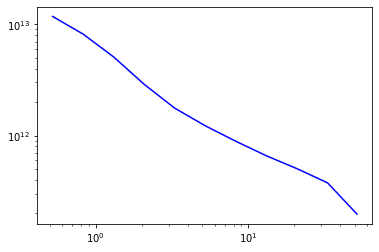

In [38]:
plt.loglog(sigma_ds_profile['radius'].mean(), sigma_ds_profile['DS'].mean(),c='b')

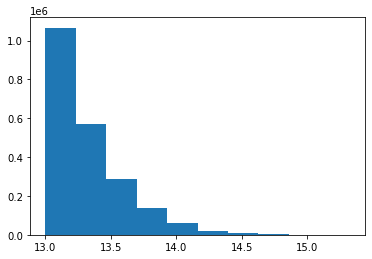

In [39]:
# All halos inner-merged with calculated DS and Sigma
plt.hist(np.log10(sigma_ds_profile['halo_mass']))
plt.show()

## Comparing with the analytical density profile models

In [3]:
halo_mass_bin = sigma_ds_profile[(sigma_ds_profile['halo_mass']>=1e14) & (sigma_ds_profile['halo_mass']<=2e14) &
                            (sigma_ds_profile['redshift']>=0.2) & (sigma_ds_profile['redshift']<0.35)]
halo_mass_bin = halo_mass_bin.reset_index(drop=True)
print(halo_mass_bin.shape)
halo_mass_bin.head()

(5781, 14)


,index,halo_id,radius,sigma,DS,baseDC2/sod_halo_mass,baseDC2/sod_halo_radius,redshift,dec,magnification,hostHaloMass,ra,halo_mass,pixel_id
0,21,128210052401,"[nan, 0.21237407100933556, 0.3169392020493418,...","[nan, 41861139534883.01, 52626161119150.555, 4...","[nan, 73560654902248.3, 108354700189885.17, 37...",7.631110e+13,0.785327,0.227820,-40.184627,0.999300,1.053795e+14,9.964063,1.484218e+14,10052
1,32,289510052401,"[0.13015666239403917, 0.20830222506884594, 0.3...","[244228542088335.7, 142647826467252.72, 434226...","[109914858628103.42, 120367301880779.06, 84679...",6.312967e+13,0.737206,0.231335,-40.631222,0.998147,9.880212e+13,10.894994,1.391579e+14,10052
2,62,295810052392,"[0.13922309133513078, 0.21714892577648634, 0.3...","[291548514513341.2, 94861758367825.67, 1093258...","[29491138334183.984, 109019373352963.66, 11621...",6.345676e+13,0.749387,0.258586,-39.536154,1.011201,8.011095e+13,11.294160,1.128323e+14,10052
3,110,386210052373,"[0.1239276162011566, 0.22165756451929497, 0.31...","[450002379710382.06, 132581457966312.77, 92098...","[-85681127241646.06, 123788202854603.62, 10055...",6.306869e+13,0.769076,0.308576,-41.648541,1.014254,7.516319e+13,11.146844,1.058636e+14,10052
4,1346,31511615401,"[0.12309217954395545, 0.2006501035990274, 0.33...","[424262251692529.1, 255828973231921.56, 144714...","[55380044731279.11, 107866687830862.73, 132613...",1.195550e+14,0.912061,0.239006,-62.517926,1.000088,1.362029e+14,56.448370,1.918351e+14,11615


array([           nan,            nan, 9.09168236e+11, 5.86959401e+11,
       3.97851941e+11, 2.56939948e+11, 1.65874379e+11, 1.17749792e+11,
       9.01216443e+10, 7.08522285e+10, 5.85170274e+10, 4.72696097e+10,
       4.06869726e+10, 4.41683091e+10,            nan])

In [34]:
from scipy.stats import sem
# cov_matrix = pd.read_csv(file_path + 'clusters-skysim/Cov-Matrix/covariance_matrix_02_03.txt',delimiter=' ', header=None)
# print(cov_matrix.shape)
# err_bar = np.sqrt(np.diag(cov_matrix))

ds_array = [cl for cl in halo_mass_bin['DS']]

err_bar = sem(ds_array, axis=0)

In [35]:
# Theoretical plot
from colossus.cosmology import cosmology
skysim = gcr.load_catalog('skysim5000_v1.1.1')
gcosmology = skysim.cosmology
params = {'flat': True, 'H0': gcosmology.H0.value, 'Om0': gcosmology.Om0 - gcosmology.Ob0, 'Ob0': gcosmology.Ob0,
         'sigma8': gcosmology.sigma8, 'ns':gcosmology.n_s}
cosmo = cosmology.setCosmology('cosmo', params)

In [36]:
print('%e'%halo_mass_bin['halo_mass'].mean())

1.356029e+14


In [67]:
Rmin = 0.5
Rmax = 50
pimax = 100
n_decade = (np.log10(Rmax)-np.log10(Rmin))
nrp_per_decade = 10
n_rp = int(nrp_per_decade*n_decade + 1 + 0.001) ## adding the inner most bin
lnrp = np.linspace(np.log(Rmin), np.log(Rmax), 125) # n_rp
bins = np.exp(lnrp)

/global/homes/k/kamau/clmmdesc/lib/python3.8/site-packages/colossus/halo/profile_base.py:664: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  surfaceDensity[i], _ = scipy.integrate.quad(integrand, log_r_use[i], log_max_r,


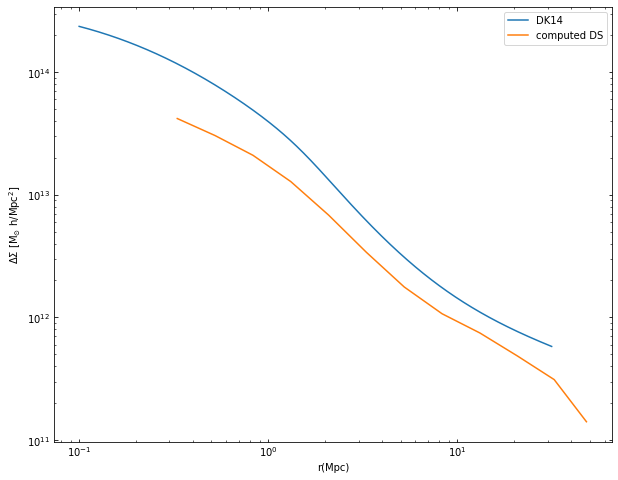

In [89]:
from colossus.halo import profile_nfw, profile_dk14, concentration

h = 0.71
Mvir = halo_mass_bin['halo_mass'].mean()
z = halo_mass_bin['redshift'].mean()
cvir = concentration.concentration(M=Mvir, mdef='vir', z=z, model = 'bullock01')

# p_nfw = profile_nfw.NFWProfile(M = Mvir, c = cvir, z = z, mdef = 'vir')
p_dk14 = profile_dk14.getDK14ProfileWithOuterTerms(M = Mvir, c = cvir, z = z, mdef = 'vir', outer_term_names = ['pl']) 

r = (10**np.arange(2,4.5,0.002))  # (10**np.arange(2,4.5,0.02)) # np.logspace(-2, 1.4, 20) # 
# rho_nfw = p_nfw.deltaSigma(r)
rho_dk14_ds = p_dk14.deltaSigma(r)


plt.figure(figsize=(10,8))

# plt.plot(r*1e-3/h, rho_nfw*1e6*h, '-', label = 'NFW')
# plt.plot(halo_mass_bin['radius'].mean(),halo_mass_bin['DS'].mean(), label = 'clmm')
plt.loglog(r*1e-3, (rho_dk14_ds*1e6), '-', label = 'DK14')  ## has h
plt.loglog(halo_mass_bin['radius'].mean(), (halo_mass_bin['DS'].mean())*h, ms = 4.0, label = 'computed DS')
plt.tick_params(which='both', direction='in', top=True, right=True)

plt.loglog()
plt.xlabel('r(Mpc)')
plt.ylabel(r'$\Delta\Sigma$ [M$_{\odot}$ h/Mpc$^2$]')


plt.legend()
plt.show()

In [38]:
halo_mass_bin['DS'].mean()

array([           nan,            nan, 5.88596663e+13, 4.27370660e+13,
       2.95267432e+13, 1.80280388e+13, 9.61199092e+12, 4.77499775e+12,
       2.49259977e+12, 1.50858733e+12, 1.05157005e+12, 6.81140483e+11,
       4.38383957e+11, 1.98818531e+11,            nan])

/global/homes/k/kamau/clmmdesc/lib/python3.8/site-packages/colossus/halo/profile_base.py:664: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  surfaceDensity[i], _ = scipy.integrate.quad(integrand, log_r_use[i], log_max_r,


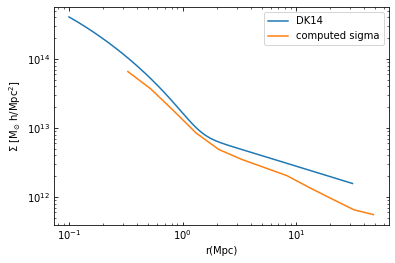

In [90]:
# rho_nfw = p_nfw.surfaceDensity(r)
rho_dk14_s = p_dk14.surfaceDensity(r)
h = 0.71

plt.figure()

# plt.loglog(r*1e-3/h, rho_nfw*1e6*h, '-', label = 'NFW')
plt.loglog(r*1e-3, rho_dk14_s*1e6, '-', label = 'DK14')
# plt.loglog(halo_mass_bin['radius'].mean(),halo_mass_bin['sigma_x'].mean(), label = 'clmm')
plt.loglog(halo_mass_bin['radius'].mean(),halo_mass_bin['sigma'].mean()*h, label = 'computed sigma')
plt.tick_params(which='both', direction='in', top=True, right=True)
plt.xlabel('r(Mpc)')
plt.ylabel(r'$\Sigma$ [M$_{\odot}$ h/Mpc$^2$]')
plt.legend()
plt.show()

### Richness-selected vs Underlying distribution

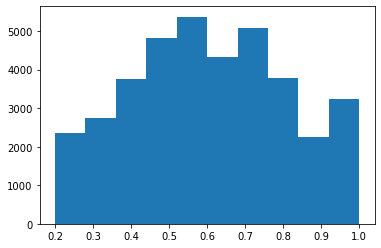

In [50]:
plt.hist(cluster_halos['z'])
plt.show()

In [52]:
richeness_2_3 = cluster_halos[(cluster_halos['z']>0.2) & (cluster_halos['z']<0.3)]
print(len(richeness_2_3))
halos_2_3 = sigma_ds_profile[(sigma_ds_profile['redshift']>0.2) & (sigma_ds_profile['redshift']<0.3)]
print(len(halos_2_3))
# richnesS_seletcted_2_3 = halos_2_3.merge

2939
94767


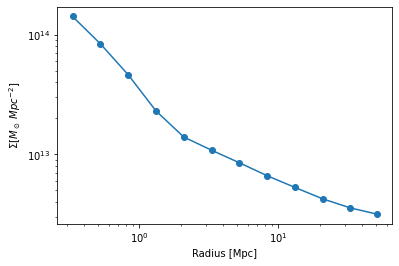

In [53]:
plt.loglog(cluster_halos['radius'].mean(),cluster_halos['sigma'].mean(), marker='o')
plt.xlabel("Radius [Mpc]")
plt.ylabel('$\Sigma [M_\odot\; Mpc^{-2}]$')
# lgd = plt.legend()
# plt.savefig('Images/stacked selected Sigma-all.jpg', bbox_inches='tight')
# plt.legend()
plt.show()

In [54]:
## Weighted Profile
def stacked_profile_weighted_by_mass_redshift(lnM_select, z_select, prof_select, lnM_all, z_all, profile_A, dm=0.1, dz=0.05):
    #### set up the bins for mass and redshift  (sigma_select/profile_select, sigma_all/profile_all)
    min_m = min(lnM_select)#-dm
    max_m = max(lnM_select)#+dm
    min_z = min(z_select)#-dz
    max_z = max(z_select)#+dz

    # print('z', min_z, max_z)
    m_bins = np.arange(min_m, max_m+dm, dm)
    z_bins = np.arange(min_z, max_z+dz, dz)
    nM = len(m_bins)-1
    nz = len(z_bins)-1
    # print('nM, nz', nM, nz)

    profile_select = np.array([i.tolist() for i in prof_select])
    profile_all = np.array([i.tolist() for i in profile_A])

    nr = np.shape(profile_select)[1]#rbp.nbins_phys_mpc...1
    profile_weighted = np.zeros(nr)
    weight_norm = 0


    pdf1_list = np.zeros([nz, nM]) # see how many bins are too narrow
    pdf2_list = np.zeros([nz, nM]) # see how many bins are too narrow

    for iz in range(nz):
        z_lo = z_bins[iz]
        z_hi = z_bins[iz+1]
        # print(z_lo,z_hi)
        for iM in range(nM):
            m_lo = m_bins[iM]
            m_hi = m_bins[iM+1]
            # print(m_lo, m_hi)
            
            select_bin = (lnM_select >= m_lo)&(lnM_select < m_hi)&(z_select>=z_lo)&(z_select<z_hi)
            weight = len(lnM_select[select_bin]) * 1.
            # print(weight, len(lnM_select[select_bin]),lnM_select[select_bin])
            weight_norm += weight
            # print(weight_norm)
            select_all = (lnM_all >= m_lo)&(lnM_all < m_hi)&(z_all>=z_lo)&(z_all<z_hi)

            pdf1_list[iz, iM] = weight
            # print(pdf1_list)
            pdf2_list[iz, iM] = len(lnM_all[select_all])
            # print(pdf2_list)

            if weight > 0 and len(lnM_all[select_all]) > 0:
                # print(weight, len(lnM_all[select_all]))
                # if weight == len(lnM_all[select_all]):
                    # print('bin is too narrow!')
                profile_weighted += (np.mean(profile_all[select_all, :], axis=0)*weight) #0
                #profile_weighted += np.nan_to_num(np.mean(profile_all[select_all, :], axis=0)*weight)
            #profile_weighted = np.nan_to_num(profile_weighted)
    profile_weighted /= weight_norm

    pdf1_list = np.concatenate(pdf1_list)
    pdf2_list = np.concatenate(pdf2_list)
    diff_list = pdf2_list - pdf1_list
    print('pdf1==pdf2', len(diff_list[diff_list == 0]), 'out of', len(diff_list))

    return profile_weighted

In [28]:
lnM_sel = np.log10(richeness_2_3['halo_mass'])
z_sel = richeness_2_3['z']
profile_sel = richeness_2_3['sigma']
profile_sel_ds = richeness_2_3['DS']

lnM_All = np.log10(halos_2_3['halo_mass'])
z_All = halos_2_3['redshift']
profile_All = halos_2_3['sigma']
profile_All_ds = halos_2_3['DS']

expected_sigma = stacked_profile_weighted_by_mass_redshift(lnM_sel, z_sel, profile_sel, lnM_All, z_All, profile_All, dm=0.1, dz=0.05)
expected_ds = stacked_profile_weighted_by_mass_redshift(lnM_sel, z_sel, profile_sel_ds, lnM_All, z_All, profile_All_ds, dm=0.1, dz=0.05)

pdf1==pdf2 1 out of 46
pdf1==pdf2 1 out of 46


In [29]:
expected_ds

array([           nan,            nan, 7.98891791e+13, 5.78760626e+13,
       3.94415283e+13, 2.47550232e+13, 1.39774534e+13, 7.25542880e+12,
       3.63342360e+12, 1.96187883e+12, 1.31610564e+12, 8.67307016e+11,
       5.19643751e+11, 2.66899498e+11,            nan])

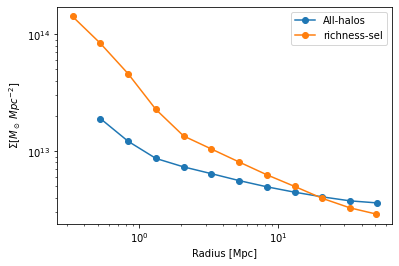

In [25]:
# Plot of richness-selected vs all profiles.....sigma
plt.loglog(sigma_ds_profile['radius'].mean(), sigma_ds_profile['sigma'].mean(),marker='o', label='All-halos')
plt.loglog(cluster_rm['radius'].mean(),cluster_rm['sigma'].mean(), marker='o', label='richness-sel')
plt.xlabel("Radius [Mpc]")
plt.ylabel('$\Sigma [M_\odot\; Mpc^{-2}]$')
lgd = plt.legend()

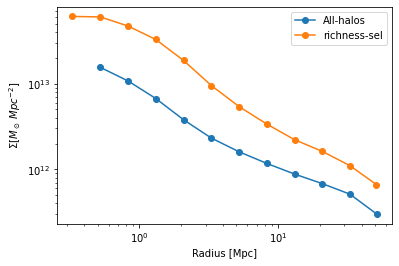

In [26]:
# Plot of richness-selected vs all profiles.....ds
plt.loglog(sigma_ds_profile['radius'].mean(), sigma_ds_profile['DS'].mean(),marker='o', label='All-halos')
plt.loglog(cluster_rm['radius'].mean(),cluster_rm['DS'].mean(), marker='o', label='richness-sel')
plt.xlabel("Radius [Mpc]")
plt.ylabel('$\Sigma [M_\odot\; Mpc^{-2}]$')
lgd = plt.legend()

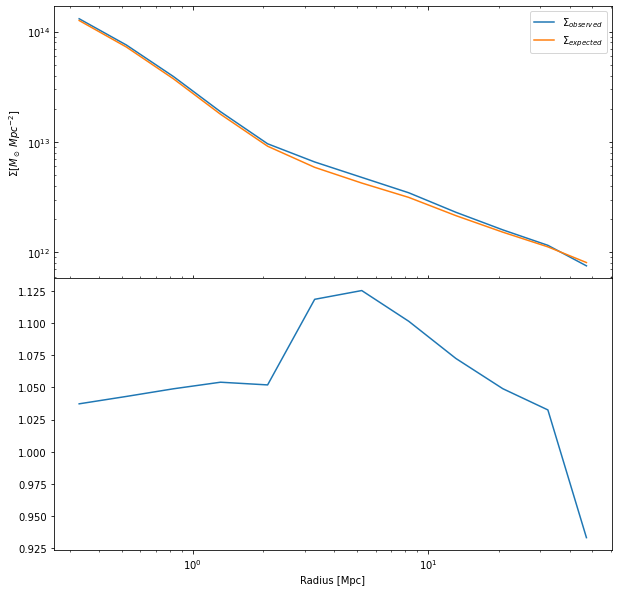

In [31]:
### Sigma plot of observed vs expected
fig = plt.figure(figsize=(10,10))
ax1 = plt.subplot(211)
ax1.loglog(richeness_2_3['radius'].mean(),richeness_2_3['sigma'].mean(), label='$\Sigma_{observed}$')
ax1.loglog(richeness_2_3['radius'].mean(),expected_sigma,label='$\Sigma_{expected}$')
ax1.set_ylabel('$\Sigma [M_\odot\; Mpc^{-2}]$')
ax1.tick_params(direction='in',which='both',top=True,right=True)
ax2 = plt.subplot(212, sharex = ax1)
ax2.semilogx(richeness_2_3['radius'].mean(),richeness_2_3['sigma'].mean()/expected_sigma)
ax2.set_xlabel("Radius [Mpc]")
lgd = ax1.legend()
# plt.savefig('Images/stacked selected-expected DeltaSigma.jpg', bbox_inches='tight')
ax1.legend()
plt.subplots_adjust(hspace=.0)
plt.setp(ax1.get_xticklabels(), visible=False)
# remove last tick label for the second subplot
yticks = ax1.yaxis.get_major_ticks()
yticks[-1].label1.set_visible(False)
plt.show()

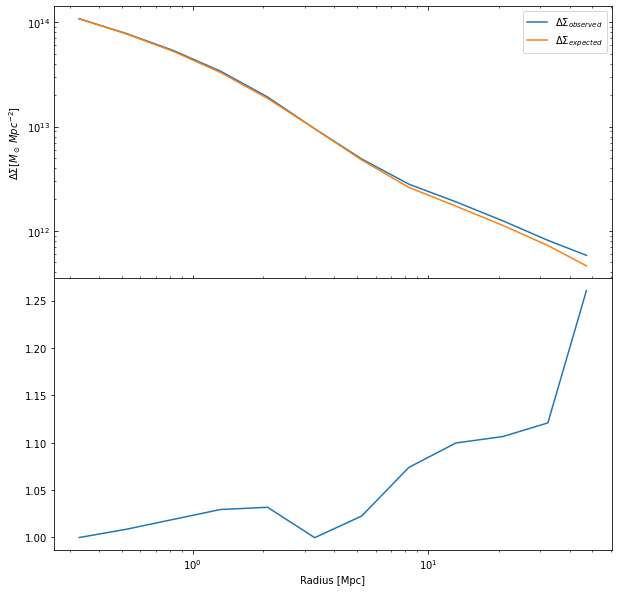

In [28]:
### DeltaSigma plot of observed vs expected
fig = plt.figure(figsize=(10,10))
ax1 = plt.subplot(211)
ax1.loglog(richeness_2_3['radius'].mean(),richeness_2_3['DS'].mean(), label='$\Delta\Sigma_{observed}$')
ax1.loglog(richeness_2_3['radius'].mean(),expected_ds,label='$\Delta\Sigma_{expected}$')
ax1.set_ylabel('$\\Delta\Sigma [M_\odot\; Mpc^{-2}]$')
ax1.tick_params(direction='in',which='both',top=True,right=True)
ax2 = plt.subplot(212, sharex = ax1)
ax2.semilogx(richeness_2_3['radius'].mean(),richeness_2_3['DS'].mean()/expected_ds)
ax2.set_xlabel("Radius [Mpc]")
lgd = ax1.legend()
# plt.savefig('Images/stacked selected-expected DeltaSigma.jpg', bbox_inches='tight')
ax1.legend()
plt.subplots_adjust(hspace=.0)
plt.setp(ax1.get_xticklabels(), visible=False)
# remove last tick label for the second subplot
yticks = ax1.yaxis.get_major_ticks()
yticks[-1].label1.set_visible(False)
plt.show()